# Predicting Heart Disease Using Machine Learning

This research aims to create a machine learning model that can predict whether or not a person has heart disease based on their medical characteristics.

Methodology:
1. Problem definition
2. Data Gathering
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Provlem Definition
> Can we predict whether a patient has a heart disease based on their clinical parameters?

## 2. Data Gathering
UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/heart+Disease
Kaggle: https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> Goal: 90% accuracy


## 4. Features

Data Dictionary

* age: Displays the age of the individual.
* sex: Displays the gender of the individual using the following format :
  1 = male
  0 = female
* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
  0 = typical angina
  1 = atypical angina
  2 = non — anginal pain
  3 = asymptotic
* trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.
* chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
* fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes
* restecg- Resting ECG : displays resting electrocardiographic results
  0 = normal
  1 = having ST-T wave abnormality
  2 = left ventricular hyperthrophy
* thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.
* exang- Exercise induced angina :
  1 = yes
  0 = no
* oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.
* slope- Slope of the peak exercise ST segment :
  0 = upsloping: better heart rate with excercise (uncommon)
  1 = flat: minimal change (typical healthy heart)
  2 = downsloping: signs of unhealthy heart
* ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
* thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising
* target : Displays whether the individual is suffering from heart disease or not :
  1 = yes
  0 = no

## Making our imports

Pandas, Matplotlib, NumPy

In [1]:
# Regular EDA and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
from zipfile import ZipFile
import os

# Path to the uploaded zip file
zip_path = "C:/Users/Meriya/Downloads/heart+disease.zip"
extract_folder = "data/heart_disease_data/"

# Extracting the zip file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Listing the files extracted
extracted_files = os.listdir(extract_folder)
extracted_files


['ask-detrano',
 'bak',
 'cleve.mod',
 'cleveland.data',
 'costs',
 'heart-disease.names',
 'hungarian.data',
 'Index',
 'long-beach-va.data',
 'new.data',
 'processed.cleveland.data',
 'processed.hungarian.data',
 'processed.switzerland.data',
 'processed.va.data',
 'reprocessed.hungarian.data',
 'switzerland.data',
 'WARNING']

In [3]:
import pandas as pd

# Defining a list of processed files to examine
processed_files = [
    'processed.cleveland.data',
    'processed.hungarian.data',
    'processed.switzerland.data',
    'processed.va.data'
]

# Reading each processed file and checking the first few rows to confirm structure
processed_data_summaries = {}

for file in processed_files:
    file_path = os.path.join(extract_folder, file)
    try:
        # Attempting to read assuming no header and common delimiters
        data = pd.read_csv(file_path, header=None)
    except:
        # In case there's an issue, trying to read with space separator
        data = pd.read_csv(file_path, header=None, sep=" ")
    processed_data_summaries[file] = data.head()

processed_data_summaries.keys(), [processed_data_summaries[file].shape for file in processed_data_summaries]


(dict_keys(['processed.cleveland.data', 'processed.hungarian.data', 'processed.switzerland.data', 'processed.va.data']),
 [(5, 14), (5, 14), (5, 14), (5, 14)])

In [4]:
# Concatenating all processed files into a single DataFrame
combined_data = pd.concat([pd.read_csv(os.path.join(extract_folder, file), header=None, sep=",", na_values="?")
                           for file in processed_files], ignore_index=True)

# Adding column names
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
combined_data.columns = column_names

combined_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# Convert columns to appropriate data types
int_columns = ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'target']
combined_data[int_columns] = combined_data[int_columns].apply(pd.to_numeric, downcast='integer', errors='coerce')

# Removing rows with any missing data across all columns
combined_data.dropna(inplace=True)


In [6]:
# Check for any remaining missing values
print(combined_data.isnull().sum())

# Check data types
print(combined_data.dtypes)

# Optionally, save the cleaned dataset to a CSV file
combined_data.to_csv('heart-disease.csv', index=False)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age            int8
sex            int8
cp             int8
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target         int8
dtype: object


## Load data

In [7]:
df = pd.read_csv("heart-disease.csv")
df.shape

(299, 14)

## EDA

Our Checklist/ Goals:

1. What question are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it
4. Where are our outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
294,68,1,4,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
295,57,1,4,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
296,57,0,2,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
297,47,1,4,150.0,226.0,0.0,0.0,98.0,1.0,1.5,2.0,0.0,7.0,1
298,56,1,4,120.0,100.0,0.0,0.0,120.0,1.0,1.5,2.0,0.0,7.0,1


In [10]:
# We want to find out how many classes we have
df["target"].value_counts()

target
0    160
1     56
2     35
3     35
4     13
Name: count, dtype: int64

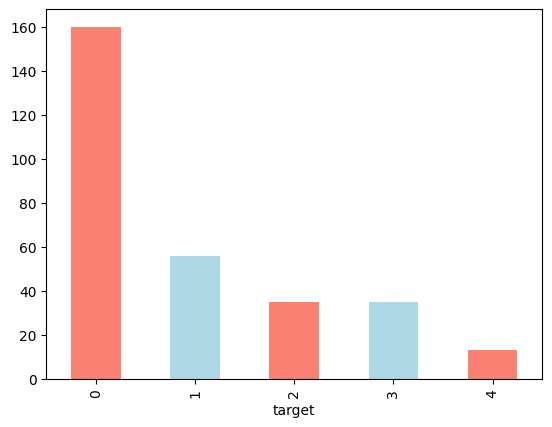

In [11]:
# This seems like we have a relatively balanced problem,because we have quite a similar amount of examples in both classes

df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    int64  
 2   cp        299 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    float64
 6   restecg   299 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     299 non-null    float64
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    float64
 11  ca        299 non-null    float64
 12  thal      299 non-null    float64
 13  target    299 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.8 KB


In [13]:
# Do we have any missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819,0.946488
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977,1.230409
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000
